Predictive Modelling

In [1]:
# Importing the necessary libraries into the environment
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix
from LearningAlgorithm import ClassificationAlgorithms

In [3]:
# Plot Settings
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [4]:
# Load the datast into the environment
df = pd.read_pickle("data_features.pkl")

# Displaying the first five rows of the dataframe
df.head()

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,participant,label,category,set,duration,pca_1,pca_2,pca_3,acc_r,gyro_r,acc_x_temp_mean_ws_5,acc_x_temp_std_ws_5,acc_y_temp_mean_ws_5,acc_y_temp_std_ws_5,acc_z_temp_mean_ws_5,acc_z_temp_std_ws_5,gyro_x_temp_mean_ws_5,gyro_x_temp_std_ws_5,gyro_y_temp_mean_ws_5,gyro_y_temp_std_ws_5,gyro_z_temp_mean_ws_5,gyro_z_temp_std_ws_5,acc_r_temp_mean_ws_5,acc_r_temp_std_ws_5,gyro_r_temp_mean_ws_5,gyro_r_temp_std_ws_5,acc_y_max_freq,acc_y_freq_weighted,acc_y_pse,acc_y_freq_0.0_Hz_ws_10,acc_y_freq_0.5_Hz_ws_10,acc_y_freq_1.0_Hz_ws_10,acc_y_freq_1.5_Hz_ws_10,acc_y_freq_2.0_Hz_ws_10,...,gyro_y_freq_0.5_Hz_ws_10,gyro_y_freq_1.0_Hz_ws_10,gyro_y_freq_1.5_Hz_ws_10,gyro_y_freq_2.0_Hz_ws_10,gyro_y_freq_2.5_Hz_ws_10,gyro_z_max_freq,gyro_z_freq_weighted,gyro_z_pse,gyro_z_freq_0.0_Hz_ws_10,gyro_z_freq_0.5_Hz_ws_10,gyro_z_freq_1.0_Hz_ws_10,gyro_z_freq_1.5_Hz_ws_10,gyro_z_freq_2.0_Hz_ws_10,gyro_z_freq_2.5_Hz_ws_10,acc_r_max_freq,acc_r_freq_weighted,acc_r_pse,acc_r_freq_0.0_Hz_ws_10,acc_r_freq_0.5_Hz_ws_10,acc_r_freq_1.0_Hz_ws_10,acc_r_freq_1.5_Hz_ws_10,acc_r_freq_2.0_Hz_ws_10,acc_r_freq_2.5_Hz_ws_10,gyro_r_max_freq,gyro_r_freq_weighted,gyro_r_pse,gyro_r_freq_0.0_Hz_ws_10,gyro_r_freq_0.5_Hz_ws_10,gyro_r_freq_1.0_Hz_ws_10,gyro_r_freq_1.5_Hz_ws_10,gyro_r_freq_2.0_Hz_ws_10,gyro_r_freq_2.5_Hz_ws_10,acc_y_temp_mean_ws_10,acc_z_temp_mean_ws_10,gyro_x_temp_mean_ws_10,gyro_y_temp_mean_ws_10,gyro_z_temp_mean_ws_10,acc_r_temp_mean_ws_10,gyro_r_temp_mean_ws_10,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:07.200,-0.196317,1.141475,-0.112140,-0.172969,-3.257000,-0.022611,B,bench,heavy,30,16.0,0.398624,-0.131413,-0.005078,1.163650,3.261668,-0.169899,0.047658,0.966662,0.120087,-0.170931,0.037420,0.259259,10.018380,-1.224232,4.954555,-5.142153,9.551144,0.998518,0.116499,13.670693,7.567018,0.0,-0.038558,0.016511,10.594918,0.450888,-0.099929,-0.106894,-0.086259,...,-16.675158,24.377583,3.838873,2.383098,1.973891,0.5,-0.684005,1.069370,-44.250721,50.542724,-32.203577,2.249242,3.253875,3.457936,0.0,-0.046058,0.015368,10.779411,0.420758,-0.130396,-0.104964,-0.096147,-0.090663,0.0,-0.076485,0.699085,109.085261,-46.276034,17.134046,-22.923868,6.752649,8.541444,0.961790,-0.129707,2.346674,-0.741877,-4.519160,0.979972,10.585419,1
2019-01-11 15:08:08.000,-0.164924,0.865523,-0.178538,-20.541984,-8.226941,21.708715,B,bench,heavy,30,16.0,0.302452,-0.174384,-0.022459,0.899003,30.998773,-0.195745,0.016863,1.004094,0.107184,-0.163685,0.035899,0.602215,12.773047,-2.090107,3.882130,4.448643,10.531980,1.037455,0.100308,15.255541,8.996353,0.0,0.045383,0.027528,10.588912,-0.530436,0.356308,0.066609,0.065961,...,10.037460,-15.857372,3.874268,3.622077,3.667534,1.0,1.254680,1.468909,-25.206092,-3.955677,23.348670,-14.169291,-12.764250,-12.587077,0.0,0.030797,0.025248,10.906494,-0.566209,0.289967,0.051408,0.055951,0.054595,0.0,-0.933818,0.357227,170.249985,28.905231,-10.351566,-15.390989,-24.971873,-20.294482,0.962230,-0.168995,1.741670,-0.820117,-1.925506,0.993577,16.242793,1
2019-01-11 15:08:08.800,-0.050594,0.971761,-0.036645,6.755364,-0.667937,-3.858589,B,bench,heavy,30,16.0,0.324916,-0.067499,0.045315,0.973767,7.808316,-0.074924,0.049795,0.905973,0.040731,-0.083048,0.055318,-7.992656,11.918001,-4.025114,3.497166,7.675738,10.918957,0.916167,0.033688,17.107384,10.946734,0.0,-0.054206,0.013580,10.688930,0.303949,-0.265866,-0.104049,-0.070518,...,2.456435,-13.148048,1.697763,0.586086,0.371189,0.0,-0.299666,1.092820,45.558295,-40.664827,30.737610,-4.528929,-2.714453,-2.389471,0.0,-0.034967,0.008867,10.945778,0.268278,-0.190794,-0.087876,-0.044505,-0.040767,0.0,-0.164589,0.398464,155.641712,-40.936010,16.958245,17.106947,-8.088858,-10.931379,0.975349,-0.120054,-2.863462,-2.945638,4.497301,0.996810,14.619993,1
2019-01-11 15:08:09.600,-0.039912,0.883784,-0.060126,15.707099,5.334875,-11.553838,B,bench,heavy,30,16.0,0.293580,-0.082578,0.064681,0.886725,20.215465,-0.049249,0.009847,0.960017,0

In [ ]:
# Dropping unnecessary columns from the dataframe
df_train = df.drop(["participant", "category", "set"], axis=1)
df_train

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label,duration,pca_1,pca_2,pca_3,acc_r,gyro_r,acc_x_temp_mean_ws_5,acc_x_temp_std_ws_5,acc_y_temp_mean_ws_5,acc_y_temp_std_ws_5,acc_z_temp_mean_ws_5,acc_z_temp_std_ws_5,gyro_x_temp_mean_ws_5,gyro_x_temp_std_ws_5,gyro_y_temp_mean_ws_5,gyro_y_temp_std_ws_5,gyro_z_temp_mean_ws_5,gyro_z_temp_std_ws_5,acc_r_temp_mean_ws_5,acc_r_temp_std_ws_5,gyro_r_temp_mean_ws_5,gyro_r_temp_std_ws_5,acc_y_max_freq,acc_y_freq_weighted,acc_y_pse,acc_y_freq_0.0_Hz_ws_10,acc_y_freq_0.5_Hz_ws_10,acc_y_freq_1.0_Hz_ws_10,acc_y_freq_1.5_Hz_ws_10,acc_y_freq_2.0_Hz_ws_10,acc_y_freq_2.5_Hz_ws_10,acc_x_temp_mean_ws_10,acc_x_max_freq,...,gyro_y_freq_0.5_Hz_ws_10,gyro_y_freq_1.0_Hz_ws_10,gyro_y_freq_1.5_Hz_ws_10,gyro_y_freq_2.0_Hz_ws_10,gyro_y_freq_2.5_Hz_ws_10,gyro_z_max_freq,gyro_z_freq_weighted,gyro_z_pse,gyro_z_freq_0.0_Hz_ws_10,gyro_z_freq_0.5_Hz_ws_10,gyro_z_freq_1.0_Hz_ws_10,gyro_z_freq_1.5_Hz_ws_10,gyro_z_freq_2.0_Hz_ws_10,gyro_z_freq_2.5_Hz_ws_10,acc_r_max_freq,acc_r_freq_weighted,acc_r_pse,acc_r_freq_0.0_Hz_ws_10,acc_r_freq_0.5_Hz_ws_10,acc_r_freq_1.0_Hz_ws_10,acc_r_freq_1.5_Hz_ws_10,acc_r_freq_2.0_Hz_ws_10,acc_r_freq_2.5_Hz_ws_10,gyro_r_max_freq,gyro_r_freq_weighted,gyro_r_pse,gyro_r_freq_0.0_Hz_ws_10,gyro_r_freq_0.5_Hz_ws_10,gyro_r_freq_1.0_Hz_ws_10,gyro_r_freq_1.5_Hz_ws_10,gyro_r_freq_2.0_Hz_ws_10,gyro_r_freq_2.5_Hz_ws_10,acc_y_temp_mean_ws_10,acc_z_temp_mean_ws_10,gyro_x_temp_mean_ws_10,gyro_y_temp_mean_ws_10,gyro_z_temp_mean_ws_10,acc_r_temp_mean_ws_10,gyro_r_temp_mean_ws_10,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:07.200,-0.196317,1.141475,-0.112140,-0.172969,-3.257000,-0.022611,bench,16.0,0.398624,-0.131413,-0.005078,1.163650,3.261668,-0.169899,0.047658,0.966662,0.120087,-0.170931,0.037420,0.259259,10.018380,-1.224232,4.954555,-5.142153,9.551144,0.998518,0.116499,13.670693,7.567018,0.0,-0.038558,0.016511,10.594918,0.450888,-0.099929,-0.106894,-0.086259,-0.081645,-0.092027,1.0,...,-16.675158,24.377583,3.838873,2.383098,1.973891,0.5,-0.684005,1.069370,-44.250721,50.542724,-32.203577,2.249242,3.253875,3.457936,0.0,-0.046058,0.015368,10.779411,0.420758,-0.130396,-0.104964,-0.096147,-0.090663,0.0,-0.076485,0.699085,109.085261,-46.276034,17.134046,-22.923868,6.752649,8.541444,0.961790,-0.129707,2.346674,-0.741877,-4.519160,0.979972,10.585419,1
2019-01-11 15:08:08.000,-0.164924,0.865523,-0.178538,-20.541984,-8.226941,21.708715,bench,16.0,0.302452,-0.174384,-0.022459,0.899003,30.998773,-0.195745,0.016863,1.004094,0.107184,-0.163685,0.035899,0.602215,12.773047,-2.090107,3.882130,4.448643,10.531980,1.037455,0.100308,15.255541,8.996353,0.0,0.045383,0.027528,10.588912,-0.530436,0.356308,0.066609,0.065961,0.063451,-0.166094,0.5,...,10.037460,-15.857372,3.874268,3.622077,3.667534,1.0,1.254680,1.468909,-25.206092,-3.955677,23.348670,-14.169291,-12.764250,-12.587077,0.0,0.030797,0.025248,10.906494,-0.566209,0.289967,0.051408,0.055951,0.054595,0.0,-0.933818,0.357227,170.249985,28.905231,-10.351566,-15.390989,-24.971873,-20.294482,0.962230,-0.168995,1.741670,-0.820117,-1.925506,0.993577,16.242793,1
2019-01-11 15:08:08.800,-0.050594,0.971761,-0.036645,6.755364,-0.667937,-3.858589,bench,16.0,0.324916,-0.067499,0.045315,0.973767,7.808316,-0.074924,0.049795,0.905973,0.040731,-0.083048,0.055318,-7.992656,11.918001,-4.025114,3.497166,7.675738,10.918957,0.916167,0.033688,17.107384,10.946734,0.0,-0.054206,0.013580,10.688930,0.303949,-0.265866,-0.104049,-0.070518,-0.063036,-0.139956,0.5,...,2.456435,-13.148048,1.697763,0.586086,0.371189,0.0,-0.299666,1.092820,45.558295,-40.664827,30.737610,-4.528929,-2.714453,-2.389471,0.0,-0.034967,0.008867,10.945778,0.268278,-0.190794,-0.087876,-0.044505,-0.040767,0.0,-0.164589,0.398464,155.641712,-40.936010,16.958245,17.106947,-8.088858,-10.931379,0.975349,-0.120054,-2.863462,-2.945638,4.497301,0.996810,14.619993,1
2019-01-11 15:08:09.600,-0.039912,0.883784,-0.060126,15.707099,5.334875,-11.553838,bench,16.0,0.293580,-0.0

In [16]:
# Splitting inti taining and testing datasets
X = df_train.drop("label",axis=1)
Y = df_train["label"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25,random_state=42, stratify=Y)

In [17]:
# Displaying the training dataset
X_train

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,duration,pca_1,pca_2,pca_3,acc_r,gyro_r,acc_x_temp_mean_ws_5,acc_x_temp_std_ws_5,acc_y_temp_mean_ws_5,acc_y_temp_std_ws_5,acc_z_temp_mean_ws_5,acc_z_temp_std_ws_5,gyro_x_temp_mean_ws_5,gyro_x_temp_std_ws_5,gyro_y_temp_mean_ws_5,gyro_y_temp_std_ws_5,gyro_z_temp_mean_ws_5,gyro_z_temp_std_ws_5,acc_r_temp_mean_ws_5,acc_r_temp_std_ws_5,gyro_r_temp_mean_ws_5,gyro_r_temp_std_ws_5,acc_y_max_freq,acc_y_freq_weighted,acc_y_pse,acc_y_freq_0.0_Hz_ws_10,acc_y_freq_0.5_Hz_ws_10,acc_y_freq_1.0_Hz_ws_10,acc_y_freq_1.5_Hz_ws_10,acc_y_freq_2.0_Hz_ws_10,acc_y_freq_2.5_Hz_ws_10,acc_x_temp_mean_ws_10,acc_x_max_freq,acc_x_freq_weighted,...,gyro_y_freq_0.5_Hz_ws_10,gyro_y_freq_1.0_Hz_ws_10,gyro_y_freq_1.5_Hz_ws_10,gyro_y_freq_2.0_Hz_ws_10,gyro_y_freq_2.5_Hz_ws_10,gyro_z_max_freq,gyro_z_freq_weighted,gyro_z_pse,gyro_z_freq_0.0_Hz_ws_10,gyro_z_freq_0.5_Hz_ws_10,gyro_z_freq_1.0_Hz_ws_10,gyro_z_freq_1.5_Hz_ws_10,gyro_z_freq_2.0_Hz_ws_10,gyro_z_freq_2.5_Hz_ws_10,acc_r_max_freq,acc_r_freq_weighted,acc_r_pse,acc_r_freq_0.0_Hz_ws_10,acc_r_freq_0.5_Hz_ws_10,acc_r_freq_1.0_Hz_ws_10,acc_r_freq_1.5_Hz_ws_10,acc_r_freq_2.0_Hz_ws_10,acc_r_freq_2.5_Hz_ws_10,gyro_r_max_freq,gyro_r_freq_weighted,gyro_r_pse,gyro_r_freq_0.0_Hz_ws_10,gyro_r_freq_0.5_Hz_ws_10,gyro_r_freq_1.0_Hz_ws_10,gyro_r_freq_1.5_Hz_ws_10,gyro_r_freq_2.0_Hz_ws_10,gyro_r_freq_2.5_Hz_ws_10,acc_y_temp_mean_ws_10,acc_z_temp_mean_ws_10,gyro_x_temp_mean_ws_10,gyro_y_temp_mean_ws_10,gyro_z_temp_mean_ws_10,acc_r_temp_mean_ws_10,gyro_r_temp_mean_ws_10,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-16 19:14:16.600,-0.076966,0.567521,0.938079,1.466639,0.069725,-3.537929,19.0,0.161830,0.489586,-0.207988,1.099089,3.830513,-0.024588,0.039128,0.564233,0.002592,0.896010,0.049996,-2.653486,6.960984,2.198376,1.664717,-5.688504,1.587419,1.060205,0.042428,8.952548,4.222711,0.0,-0.014308,0.001478,6.220784,0.060342,-0.009588,-0.035091,-0.015108,-0.010638,0.007679,0.0,1.189735,...,-1.852489,0.328871,-0.918400,-1.326203,-1.317630,0.5,-1.382622,0.355688,-48.477383,12.762585,1.836480,4.899150,3.581045,3.190479,0.0,-0.091805,0.008268,10.722960,0.093926,-0.182304,-0.161617,-0.128598,-0.121421,0.0,-0.364122,0.417404,88.266261,-30.927199,6.409716,-8.179864,-0.970112,1.181262,0.565709,0.801611,-2.681805,-0.963358,-4.884666,0.983906,8.614864,2
2019-01-16 19:30:57.800,0.089633,-1.151452,-0.058587,-6.941699,-11.870002,2.121051,34.0,-0.424931,-0.129847,-0.014203,1.156421,13.913410,0.082598,0.007465,-1.055699,0.051043,-0.028832,0.017528,-0.649949,4.879113,-11.559783,2.666190,-0.428968,2.219857,1.059456,0.051716,12.759766,2.695455,1.5,-0.089850,0.006796,-11.780249,-0.076795,0.144533,0.160124,0.150540,0.145591,0.089324,0.0,-0.222509,...,-29.186588,-6.659481,4.238831,1.689603,1.228881,0.0,-1.162000,0.407849,34.918621,-12.083373,-2.516484,-1.992538,-1.491540,-1.374072,0.0,-0.090537,0.006815,11.834029,0.071613,-0.149155,-0.161331,-0.151178,-0.146071,0.0,0.462926,0.321406,150.056208,21.102040,9.581932,30.303902,8.145121,9.616407,-1.080459,-0.047179,-1.480582,-4.695139,3.528202,1.085568,12.209666,3
2019-01-15 13:53:09.800,-0.388047,0.822755,-0.032437,-9.334721,0.296380,19.082472,14.0,0.302361,-0.128299,-0.140096,0.910252,21.245367,-0.316228,0.078103,0.917700,0.123904,0.001601,0.036797,2.681107,7.681036,9.048411,5.372279,-13.365654,20.334776,0.977700,0.095312,25.264892,11.434634,0.0,-0.045911,0.050253,10.427497,-0.938478,0.199347,-0.021181,-0.029521,-0.032117,-0.294838,1.0,-0.269843,...,-39.662961,-1.638256,-5.669029,-5.183437,-5.023195,0.5,1.504771,1.369394,-23.404094,31.503741,-67.172580,-24.918282,-25.318881,-25.170894,0.0,-0.064216,0.032773,11.004341,-0.766976,0.107637,-0.082623,-0.057152,-0.055085,0.0,0.226292,0.248449,270.791978,-25.738229,-18.558770,55.722356,4.909504,1.319361,0.962899,-0.033111,-3.970033,0.713435,-0.108065,1.015926,24.296467,1
2019-01-14 13:53:20.200,-0.341795,0.782825,-0.189305,6.820083,-8.611912,-11.332454,14.0,0.2878

In [18]:
# Displaying the testing dataset
X_test

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,duration,pca_1,pca_2,pca_3,acc_r,gyro_r,acc_x_temp_mean_ws_5,acc_x_temp_std_ws_5,acc_y_temp_mean_ws_5,acc_y_temp_std_ws_5,acc_z_temp_mean_ws_5,acc_z_temp_std_ws_5,gyro_x_temp_mean_ws_5,gyro_x_temp_std_ws_5,gyro_y_temp_mean_ws_5,gyro_y_temp_std_ws_5,gyro_z_temp_mean_ws_5,gyro_z_temp_std_ws_5,acc_r_temp_mean_ws_5,acc_r_temp_std_ws_5,gyro_r_temp_mean_ws_5,gyro_r_temp_std_ws_5,acc_y_max_freq,acc_y_freq_weighted,acc_y_pse,acc_y_freq_0.0_Hz_ws_10,acc_y_freq_0.5_Hz_ws_10,acc_y_freq_1.0_Hz_ws_10,acc_y_freq_1.5_Hz_ws_10,acc_y_freq_2.0_Hz_ws_10,acc_y_freq_2.5_Hz_ws_10,acc_x_temp_mean_ws_10,acc_x_max_freq,acc_x_freq_weighted,...,gyro_y_freq_0.5_Hz_ws_10,gyro_y_freq_1.0_Hz_ws_10,gyro_y_freq_1.5_Hz_ws_10,gyro_y_freq_2.0_Hz_ws_10,gyro_y_freq_2.5_Hz_ws_10,gyro_z_max_freq,gyro_z_freq_weighted,gyro_z_pse,gyro_z_freq_0.0_Hz_ws_10,gyro_z_freq_0.5_Hz_ws_10,gyro_z_freq_1.0_Hz_ws_10,gyro_z_freq_1.5_Hz_ws_10,gyro_z_freq_2.0_Hz_ws_10,gyro_z_freq_2.5_Hz_ws_10,acc_r_max_freq,acc_r_freq_weighted,acc_r_pse,acc_r_freq_0.0_Hz_ws_10,acc_r_freq_0.5_Hz_ws_10,acc_r_freq_1.0_Hz_ws_10,acc_r_freq_1.5_Hz_ws_10,acc_r_freq_2.0_Hz_ws_10,acc_r_freq_2.5_Hz_ws_10,gyro_r_max_freq,gyro_r_freq_weighted,gyro_r_pse,gyro_r_freq_0.0_Hz_ws_10,gyro_r_freq_0.5_Hz_ws_10,gyro_r_freq_1.0_Hz_ws_10,gyro_r_freq_1.5_Hz_ws_10,gyro_r_freq_2.0_Hz_ws_10,gyro_r_freq_2.5_Hz_ws_10,acc_y_temp_mean_ws_10,acc_z_temp_mean_ws_10,gyro_x_temp_mean_ws_10,gyro_y_temp_mean_ws_10,gyro_z_temp_mean_ws_10,acc_r_temp_mean_ws_10,gyro_r_temp_mean_ws_10,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-11 16:09:38.800,-0.207788,0.761998,0.237864,5.917315,0.714158,3.451819,24.0,0.258341,0.060114,-0.097990,0.824862,6.887648,-0.238583,0.033875,0.808369,0.086182,0.369571,0.109584,7.633125,5.884087,2.504326,1.339075,3.675392,1.705358,0.922901,0.125705,9.642114,4.939458,0.0,-0.029678,0.016986,9.765649,-0.464254,0.085289,-0.021602,-0.021417,-0.021833,-0.255753,0.5,-0.044543,...,-19.995092,-12.208378,-6.319843,-5.773710,-5.661704,0.0,2.281137,1.291535,5.187902,1.164162,-8.401656,-3.738889,-2.928746,-2.740444,0.0,-0.037929,0.029653,11.055642,-0.737488,0.112943,-0.022983,-0.023142,-0.022590,0.0,0.244389,0.225597,98.001832,16.469221,-9.252102,4.458471,5.502920,5.086329,0.895856,0.405138,1.766476,-1.344027,0.774274,1.017663,8.504442,1
2019-01-18 17:04:06.800,0.116817,0.801256,0.517942,1.850189,-1.307010,0.519323,16.0,0.237381,0.283223,-0.017655,0.961208,2.324042,0.107283,0.009701,0.816994,0.016272,0.519857,0.032639,-3.077469,5.087531,-2.387578,0.647238,1.792990,1.052277,0.974560,0.029941,5.874500,3.359401,0.0,0.026989,0.002041,8.587384,0.102181,0.047447,0.027776,0.022563,0.020961,0.091553,0.0,-0.165367,...,-3.203729,-9.318336,-4.394999,-3.411965,-3.188743,0.0,-2.117649,0.443147,25.279851,-6.724704,-4.063354,-2.501556,-1.718742,-1.545354,0.0,0.100593,0.024613,10.719934,0.559910,0.128693,0.143073,0.128596,0.122738,0.0,0.081711,0.161888,120.352792,0.980949,-19.435037,7.730540,0.947484,5.991452,0.776654,0.541723,6.101096,-1.064824,2.599145,0.954848,11.009974,2
2019-01-19 17:21:34.000,-0.015524,0.914424,-0.221122,4.063975,-6.546837,3.480522,26.0,0.306821,-0.172447,0.093529,0.940907,8.455235,0.028168,0.029926,0.874414,0.031746,-0.153103,0.044007,8.536282,10.405369,-3.052858,1.973402,-2.323790,7.503106,0.889566,0.036693,14.922645,5.776274,0.0,0.030335,0.029059,10.539865,0.671747,-0.171449,0.034787,0.027086,0.026725,0.002759,1.0,0.564146,...,-17.666092,-24.516424,-1.586414,-0.998264,-0.817973,1.0,1.329137,0.427090,2.233104,-20.506805,54.746897,4.079645,2.063900,1.625046,0.0,0.032240,0.029624,10.726386,0.696444,-0.162305,0.039695,0.025302,0.027990,0.0,0.328476,0.178661,153.460496,-15.150703,-2.985348,-3.018318,20.379179,11.274719,0.947462,-0.169350,1.462814,-0.317835,-0.560785,0.963724,13.760054,1
2019-01-12 16:24:30.000,0.018654,-1.215766,-0.052021,10.629670,-5.959414,2.881203,30.0,-0.442158,-0.140704,-0.025999,1.217021,12.522213,0.03

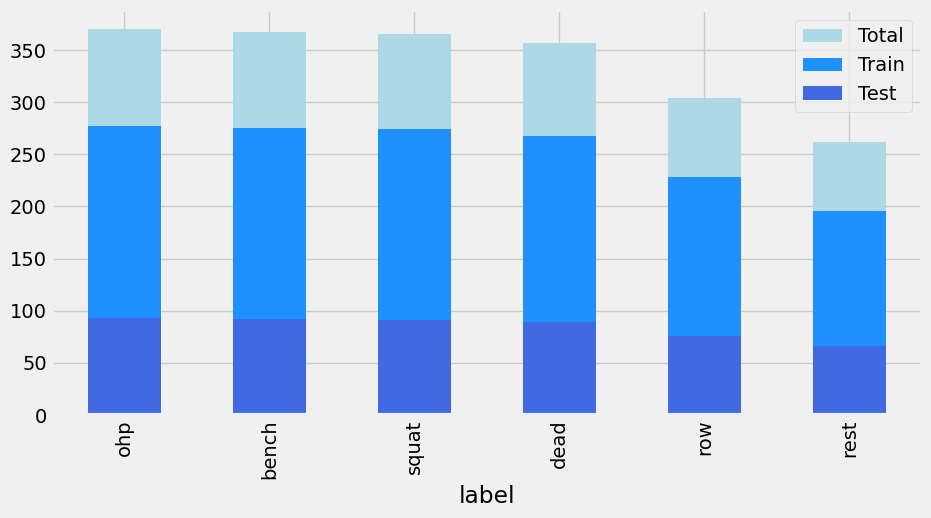

In [19]:
# Distribution of the training and testing datasets
fig, ax = plt.subplots(figsize=(10,5))
df_train["label"].value_counts().plot(kind="bar", ax=ax, color="lightblue", label="Total")
Y_train.value_counts().plot(kind="bar",ax=ax, color="dodgerblue",label="Train")
Y_test.value_counts().plot(kind="bar",ax=ax, color="royalblue",label="Test")
plt.legend()
plt.show()

In [27]:
# Splitting features into subsets
basic_features = ["acc_x","acc_y","acc_z","gyro_x","gyro_y","gyro_z"]
square_features = ["acc_r","gyro_r"]
pca_features = ["pca_1","pca_2","pca_3"]
time_features = [f for f in df_train.columns if "_temp_" in f]
frequency_features =  [f for f in df_train.columns if ("_freq" in f) or ("_pse" in f)]
cluster_features = ["cluster"]

In [28]:
print("Basic features:",len(basic_features))
print("Square features:",len(square_features))
print("PCA features:",len(pca_features))
print("Time features:",len(time_features))
print("Frequency features:",len(frequency_features))
print("Cluster features:",len(cluster_features))

Basic features: 6
Square features: 2
PCA features: 3
Time features: 24
Frequency features: 72
Cluster features: 1


In [30]:
# Creating feature sets 
feature_set_1 = list(set(basic_features))
feature_set_2 = list(set(basic_features + square_features))
feature_set_3 = list(set(feature_set_2 + time_features))
feature_set_4 = list(set(feature_set_3 + time_features + cluster_features))

In [33]:
# Performing foward feature selection using Decision Tree
learner = ClassificationAlgorithms()
max_features = 10
selected_features, ordered_features, ordered_scores = learner.forward_selection(max_features, X_train,Y_train)

0
1
2
3
4
5
6
7
8
9


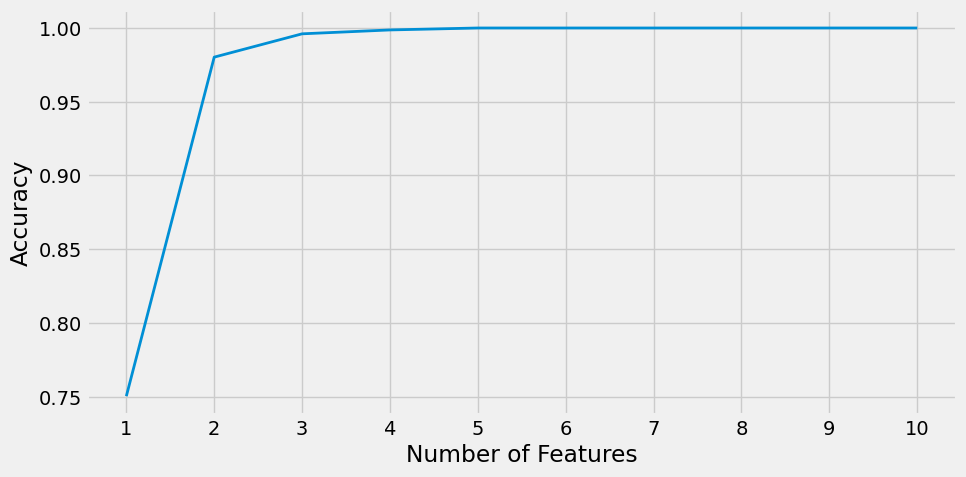

In [36]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1, max_features + 1,1),ordered_scores)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, max_features + 1,1))
plt.show()

In [ ]:
# Grid seach for the best hyperparameters and model selection
possible_feature_sets =[
    feature_set_1,
    feature_set_2,
    feature_set_3,
    feature_set_4,
    selected_features
]

feature_names =[
    "feature_set_1",
    "feature_set_2",
    "feature_set_3",
    "feature_set_4",
    "selected_features"
]

In [44]:
iterations = 1
score_df = pd.DataFrame()


for i, f in zip(range(len(possible_feature_sets)), feature_names):
    print("Feature set:", i)
    selected_train_X = X_train[possible_feature_sets[i]]
    selected_test_X = X_test[possible_feature_sets[i]]

    # First run non deterministic classifiers to average their score.
    performance_test_nn = 0
    performance_test_rf = 0

    for it in range(0, iterations):
        print("\tTraining neural network,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(
            selected_train_X,
            Y_train,
            selected_test_X,
            gridsearch=False,
        )
        performance_test_nn += accuracy_score(Y_test, class_test_y)

        print("\tTraining random forest,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(
            selected_train_X, Y_train, selected_test_X, gridsearch=True
        )
        performance_test_rf += accuracy_score(Y_test, class_test_y)

    performance_test_nn = performance_test_nn / iterations
    performance_test_rf = performance_test_rf / iterations

    # And we run our deterministic classifiers:
    print("\tTraining KNN")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.k_nearest_neighbor(
        selected_train_X, Y_train, selected_test_X, gridsearch=True
    )
    performance_test_knn = accuracy_score(Y_test, class_test_y)

    print("\tTraining decision tree")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.decision_tree(
        selected_train_X, Y_train, selected_test_X, gridsearch=True
    )
    performance_test_dt = accuracy_score(Y_test, class_test_y)

    print("\tTraining naive bayes")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.naive_bayes(selected_train_X, Y_train, selected_test_X)

    performance_test_nb = accuracy_score(Y_test,class_test_y)

    # Save results to dataframe
    models = ["NN", "RF", "KNN", "DT", "NB"]
    new_scores = pd.DataFrame(
        {
            "model": models,
            "feature_set": f,
            "accuracy": [
                performance_test_nn,
                performance_test_rf,
                performance_test_knn,
                performance_test_dt,
                performance_test_nb,
            ],
        }
    )
    score_df = pd.concat([score_df, new_scores])

Feature set: 0
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 1
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 2
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 3
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 4
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes


In [ ]:
# Displaying the accuracy of each of the feature sets
score_df.sort_values(by="accuracy", ascending=False)

,model,feature_set,accuracy
1,RF,selected_features,0.994083
3,DT,selected_features,0.986193
1,RF,feature_set_4,0.980276
1,RF,feature_set_3,0.980276
0,NN,feature_set_3,0.978304
0,NN,feature_set_4,0.974359
0,NN,selected_features,0.970414
4,NB,feature_set_3,0.970414
4,NB,feature_set_4,0.958580
3,DT,feature_set_3,0.954635


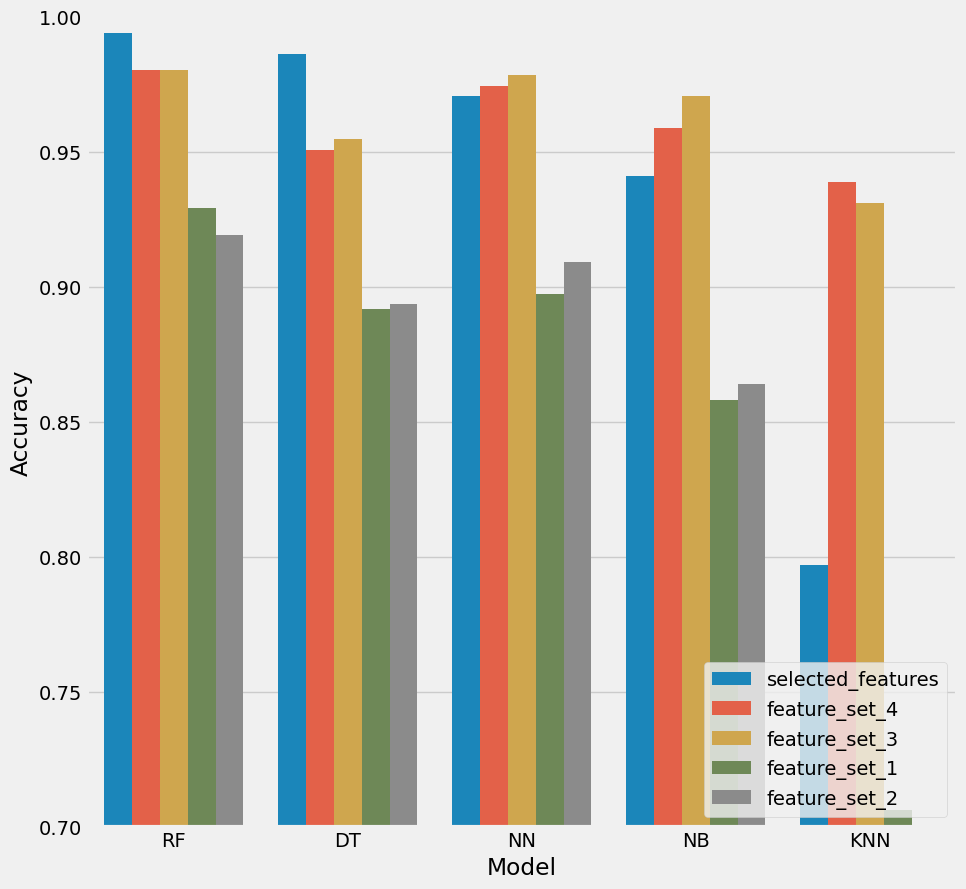

In [49]:
# Plotting the accuracy of each of the feature sets
plt.figure(figsize=(10,10))
sns.barplot(x="model",y="accuracy", hue = "feature_set", data=score_df)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.7,1)
plt.legend(loc="lower right")
plt.show()

In [51]:
# Selecting the best performing model (Random Forest) and Evaluating it
(
class_train_y,
class_test_y,
class_train_prob_y,
class_test_prob_y,
)= learner.random_forest(
    X_train[selected_features], Y_train, X_test[selected_features],gridsearch=True
 )

In [53]:
accuracy = accuracy_score(Y_test,class_test_y)
accuracy

0.9960552268244576

In [55]:
classes = class_test_prob_y.columns
cm = confusion_matrix(Y_test,class_test_y,labels=classes)
cm

array([[90,  0,  2,  0,  0,  0],
       [ 0, 89,  0,  0,  0,  0],
       [ 0,  0, 93,  0,  0,  0],
       [ 0,  0,  0, 66,  0,  0],
       [ 0,  0,  0,  0, 76,  0],
       [ 0,  0,  0,  0,  0, 91]])

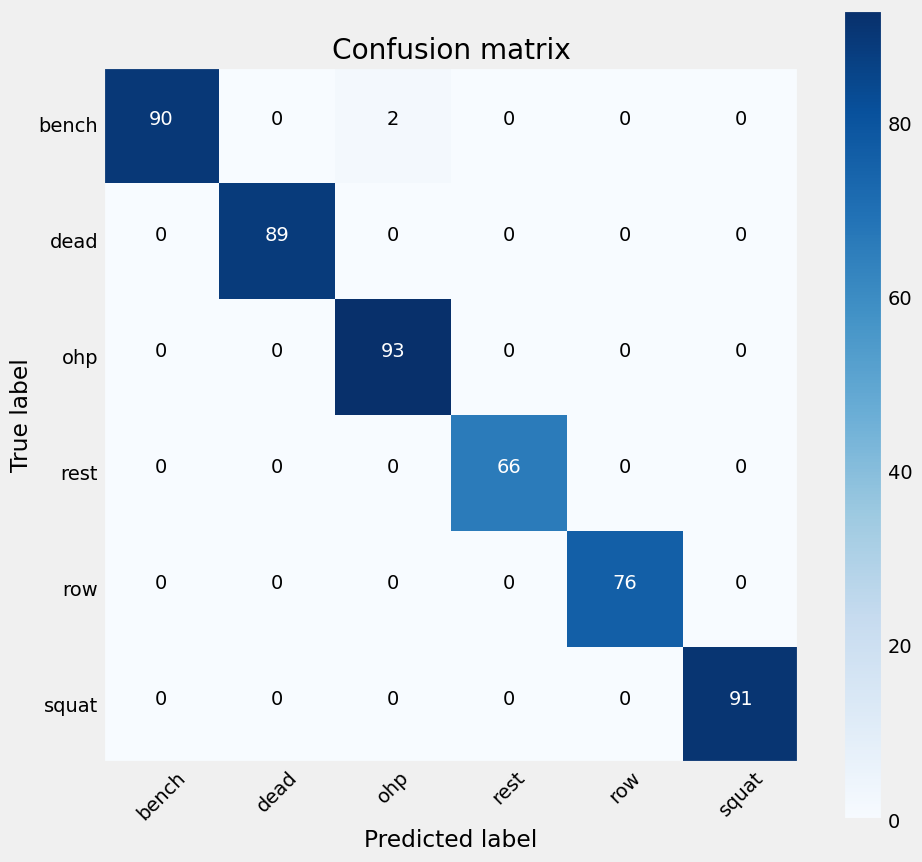

In [56]:
# Creating a confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [64]:
# Select train and test data based on participants
participants_df = df.drop(["set","category"],axis=1)
X_train = participants_df[participants_df["participant"] != "A"].drop("label",axis=1)
Y_train = participants_df[participants_df["participant"] != "A"]["label"]

In [65]:
X_test = participants_df[participants_df["participant"] == "A"].drop("label",axis=1)
Y_test = participants_df[participants_df["participant"]  == "A"]["label"]

In [66]:
X_train = X_train.drop(["participant"],axis=1)
X_test = X_test.drop(["participant"],axis=1)

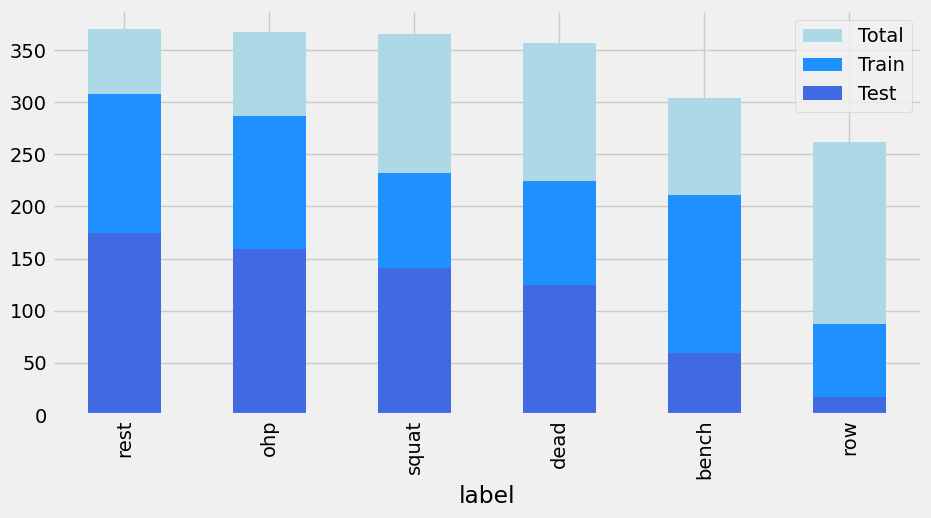

In [67]:
# Distribution of the training and testing datasets
fig, ax = plt.subplots(figsize=(10,5))
df_train["label"].value_counts().plot(kind="bar", ax=ax, color="lightblue", label="Total")
Y_train.value_counts().plot(kind="bar",ax=ax, color="dodgerblue",label="Train")
Y_test.value_counts().plot(kind="bar",ax=ax, color="royalblue",label="Test")
plt.legend()
plt.show()

In [68]:
# Selecting the best performing model (Random Forest) and Evaluating it
(
class_train_y,
class_test_y,
class_train_prob_y,
class_test_prob_y,
)= learner.random_forest(
    X_train[selected_features], Y_train, X_test[selected_features],gridsearch=True
 )

In [69]:
accuracy = accuracy_score(Y_test,class_test_y)
accuracy

0.977810650887574

In [70]:
classes = class_test_prob_y.columns
cm = confusion_matrix(Y_test,class_test_y,labels=classes)
cm

array([[ 58,   0,   1,   0,   0,   0],
       [  0, 125,   0,   0,   0,   0],
       [ 13,   0, 146,   0,   0,   0],
       [  0,   1,   0, 174,   0,   0],
       [  0,   0,   0,   0,  17,   0],
       [  0,   0,   0,   0,   0, 141]])

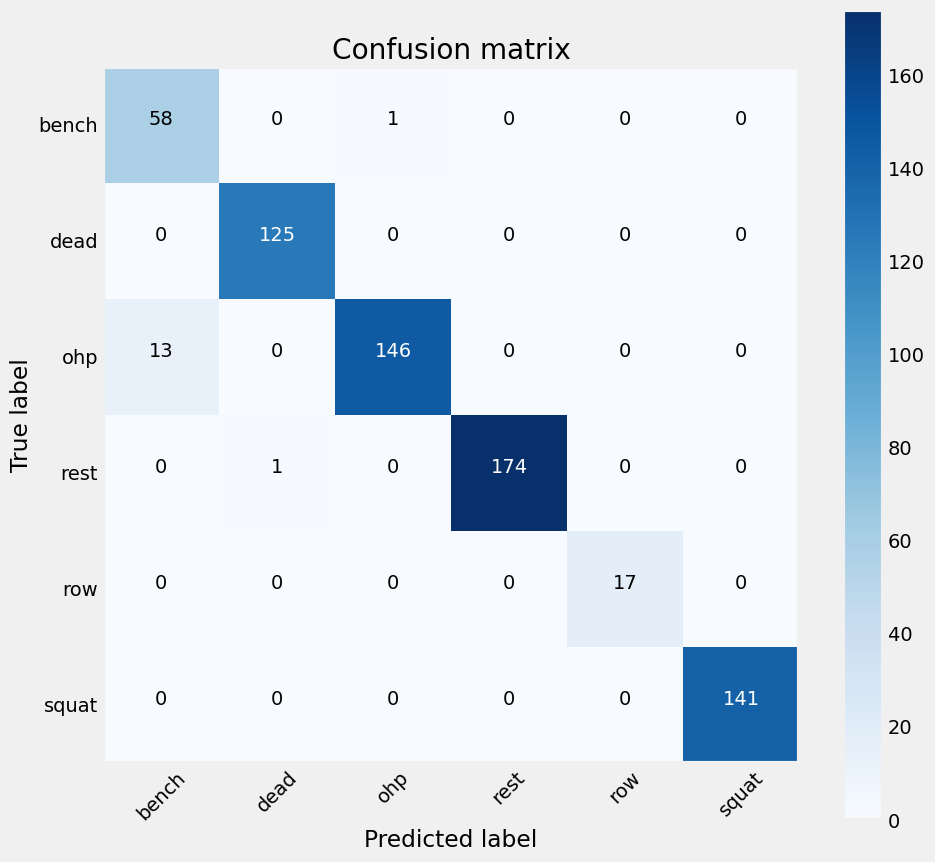

In [71]:
# Creating a confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [ ]:
# Trying a more complex model : Feedforward Neural Network
(
class_train_y,
class_test_y,
class_train_prob_y,
class_test_prob_y,
)= learner.feedforward_neural_network(
    X_train[selected_features], Y_train, X_test[selected_features],gridsearch=False
 )

In [74]:
accuracy = accuracy_score(Y_test,class_test_y)
accuracy

0.9497041420118343

In [75]:
classes = class_test_prob_y.columns
cm = confusion_matrix(Y_test,class_test_y,labels=classes)
cm

array([[ 59,   0,   0,   0,   0,   0],
       [  0, 118,   0,   1,   6,   0],
       [ 25,   0, 134,   0,   0,   0],
       [  0,   0,   2, 173,   0,   0],
       [  0,   0,   0,   0,  17,   0],
       [  0,   0,   0,   0,   0, 141]])

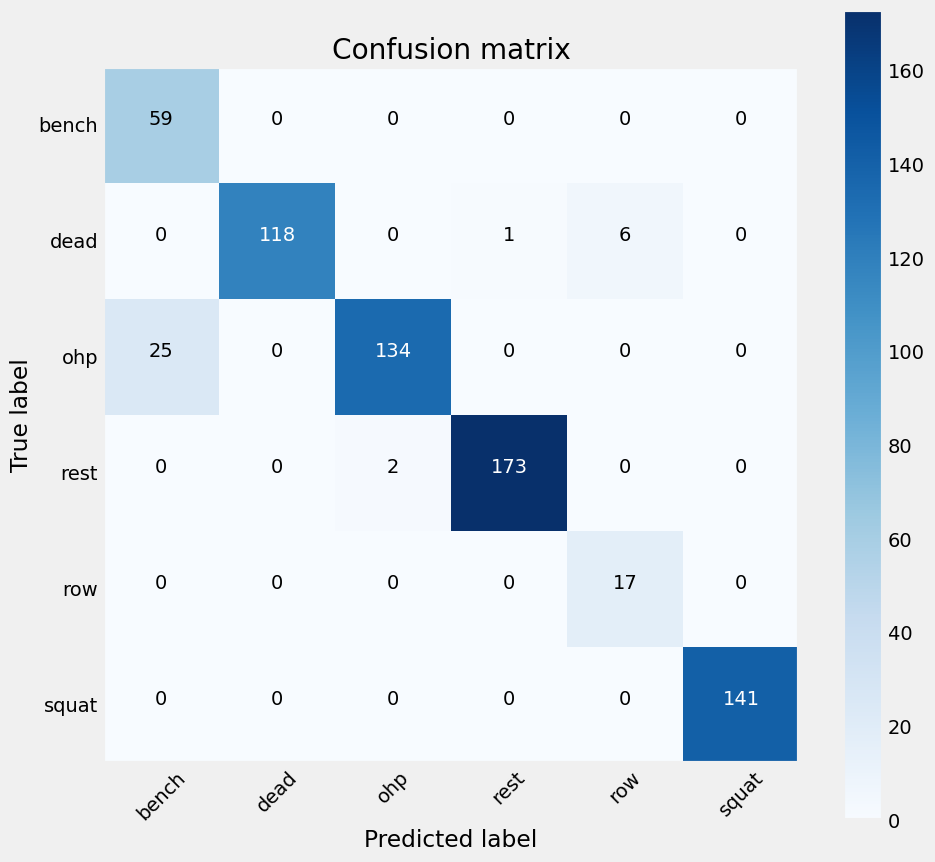

In [76]:
# Creating a confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()